<a href="https://colab.research.google.com/github/AdrienneLoc/AI/blob/main/AI/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns



data = pd.read_csv('/content/drive/MyDrive/nasa_asteroid.csv')


data_copy = data.drop(['Neo Reference ID', 'Name', 'Equinox', 'Orbit ID', 'Orbit Determination Date', 'Close Approach Date', 'Epoch Date Close Approach', 'Orbiting Body', 'Epoch Osculation', 'Orbit Uncertainity', 'Epoch Date Close Approach'], axis = 1)


scaler = StandardScaler()
data_copy_scaled = scaler.fit_transform(data_copy)
print(data_copy_scaled)

[[-0.23104209 -0.20941058 -0.20941058 ...  0.77839321 -0.43110028
   2.28209268]
 [-0.33482448 -0.15840557 -0.15840557 ... -0.06909298  0.31258164
  -0.4381943 ]
 [-0.68076581  0.07278876  0.07278876 ...  1.03940428 -0.52211437
   2.28209268]
 ...
 [ 0.14949337 -0.34623784 -0.34623784 ...  0.20776991 -0.63207867
  -0.4381943 ]
 [-0.16185382 -0.23970271 -0.23970271 ...  0.2079915  -0.56766111
  -0.4381943 ]
 [-1.09278193  0.53049632  0.53049632 ...  0.03397983 -0.54733945
  -0.4381943 ]]


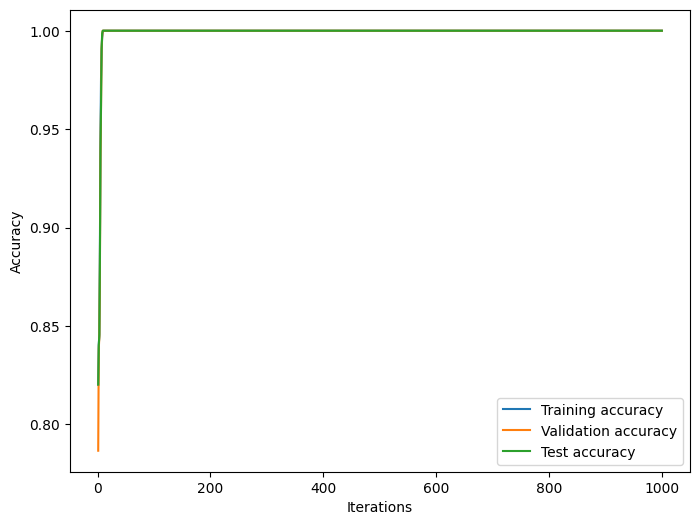

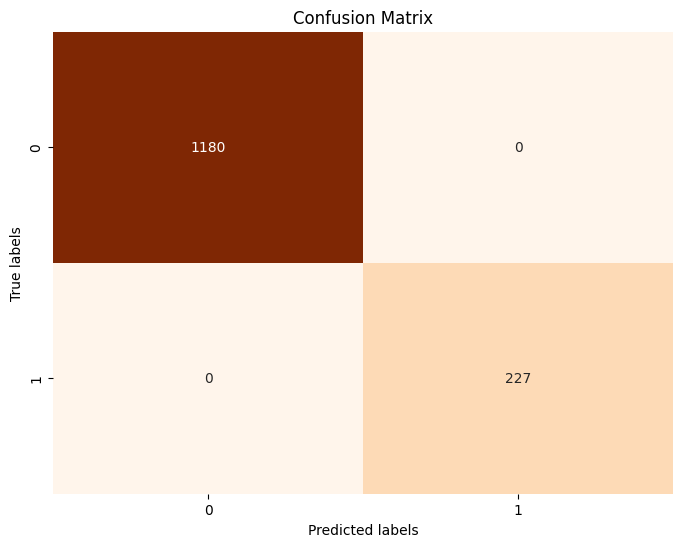

In [ ]:
x = data_copy_scaled
y = (data_copy.Hazardous == True).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(40, 50), max_iter=1000)


train_accuracies = []
val_accuracies = []
test_accuracies = []


for i in range(1000):
    mlp.partial_fit(x_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(x_train, y_train))
    val_accuracies.append(mlp.score(x_val, y_val))
    test_accuracies.append(mlp.score(x_test, y_test))


plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = mlp.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


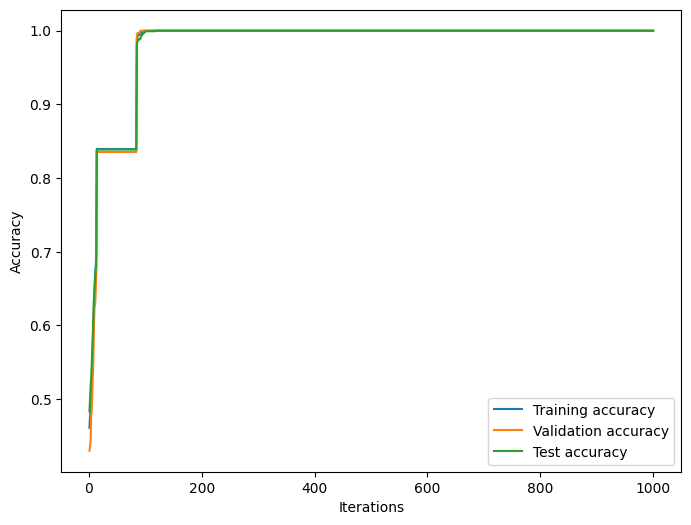

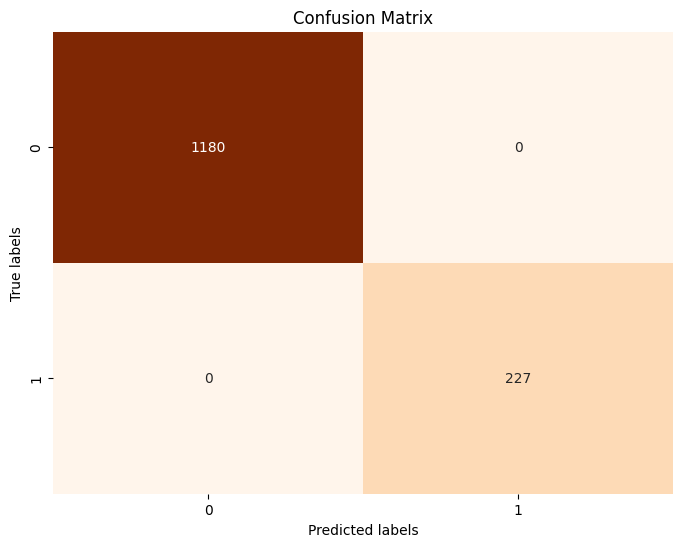

In [ ]:
x = data_copy_scaled
y = (data_copy.Hazardous == True).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(1), max_iter=1000)


train_accuracies = []
val_accuracies = []
test_accuracies = []


for i in range(1000):
    mlp.partial_fit(x_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(x_train, y_train))
    val_accuracies.append(mlp.score(x_val, y_val))
    test_accuracies.append(mlp.score(x_test, y_test))


plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = mlp.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

train_accuracy = mlp.score(x_train, y_train)
test_accuracy = mlp.score(x_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Layer 0 - Weight matrix shape: (32, 40)
Layer 1 - Weight matrix shape: (40, 50)
Layer 2 - Weight matrix shape: (50, 1)

Layer 0 - Intercept vector shape: (40,)
Layer 1 - Intercept vector shape: (50,)
Layer 2 - Intercept vector shape: (1,)
Overall Training Accuracy: 1.0
Overall Test Accuracy: 1.0
